![](https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png)

# House Prices Prediction

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Попросите покупателя дома описать дом своей мечты, 
# и он, вероятно, не начнет с высоты потолка подвала 
# или близости к железной дороге с востока на запад. 
# Но набор данных этого конкурса игровых площадок доказывает, 
# что гораздо больше влияет на ценовые переговоры, 
# чем количество спален или забор из белого штакетника.

# С 79 независимыми переменными, описывающими (почти) каждый аспект жилых домов в Эймсе, 
# штат Айова, этот конкурс ставит перед вами задачу предсказать окончательную цену каждого дома.

# Читаем и изучаем полученные данные

**Читаем данные и обрезаем Id столбец, он не нужен для обучения** 

In [19]:
data_train = pd.read_csv(r'train.csv')
data_train = data_train.drop('Id', axis=1)

**Выводим первые пять строк**

In [20]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Описание наименований столбцов**
- SalePrice: цена продажи недвижимости в долларах. Это целевая переменная, которую вы пытаетесь предсказать.
- MSSubClass: класс здания
- MSZoning: Общая классификация зонирования
- LotFrontage: Линейные футы улицы, соединенной с недвижимостью
- LotArea: Размер участка в квадратных футах.
- Улица: Тип подъездной дороги
- Аллея: Тип доступа к аллее
- LotShape: Общий вид недвижимости
- LandContour: Плоскостность объекта
- Утилиты: Тип доступных утилит
- LotConfig: конфигурация лота
- LandSlope: уклон участка
- Окрестности: физические местоположения в черте города Эймс.
- Условие 1: Близость к главной дороге или железной дороге
- Условие 2: близость к главной дороге или железной дороге (при наличии второй)
- BldgType: Тип жилья
- HouseStyle: стиль жилья
- Общее качество: общее качество материала и отделки.
- TotalCond: общая оценка состояния
- Год постройки: Первоначальная дата постройки
- YearRemodAdd: дата переделки
- RoofStyle: тип крыши
- RoofMatl: Материал крыши
- Exterior1st: Внешнее покрытие дома
- Exterior2nd: Внешнее покрытие дома (если более одного материала)
- MasVnrType: Тип каменной кладки
- MasVnrArea: Площадь каменной кладки в квадратных футах.
- ExterQual: качество материалов экстерьера
- ExterCond: Текущее состояние материала снаружи.
- Фундамент: Тип фундамента
- BsmtQual: Высота подвала
- BsmtCond: Общее состояние подвала
- BsmtExposure: Стены подвала на уровне выхода или сада.
- BsmtFinType1: Качество отделки цокольного этажа
- BsmtFinSF1: тип 1 с отделкой в квадратных футах
- BsmtFinType2: Качество второй обработанной области (если присутствует)
- BsmtFinSF2: тип 2 с отделкой в квадратных футах
- BsmtUnfSF: Незавершенные квадратные футы цокольного этажа.
- TotalBsmtSF: Общая площадь подвала в квадратных футах.
- Отопление: Тип отопления
- ОтоплениеQC: Качество и состояние отопления
- CentralAir: центральное кондиционирование
- Электрика: Электрическая система
- 1stFlrSF: квадратные футы первого этажа
- 2ndFlrSF: Квадратные футы второго этажа.
- LowQualFinSF: квадратные футы с отделкой низкого качества (все этажи)
- GrLivArea: жилая площадь над землей в квадратных футах
- BsmtFullBath: Ванные комнаты в подвале
- BsmtHalfBath: Половина ванных комнат в подвале
- FullBath: полностью оборудованные ванные комнаты выше уровня земли.
- HalfBath: полуванны выше уровня
- Спальня: Количество спален выше цокольного этажа
- Кухня: Количество кухонь
- KitchenQual: Качество кухни
- TotRmsAbvGrd: Общее количество комнат выше класса (не включая ванные комнаты)
- Функциональность: рейтинг домашней функциональности
- Камины: Количество каминов
- FireplaceQu: качество камина
- GarageType: Место в гараже
- GarageYrBlt: Год постройки гаража.
- GarageFinish: Внутренняя отделка гаража
- GarageCars: Размер гаража по вместимости автомобиля
- GarageArea: Размер гаража в квадратных футах.
- GarageQual: качество гаража
- GarageCond: Гаражное состояние
- PavedDrive: Асфальтированная дорога
- WoodDeckSF: площадь деревянной палубы в квадратных футах.
- OpenPorchSF: площадь открытого крыльца в квадратных футах.
- EnclosedPorch: закрытая площадь крыльца в квадратных футах.
- 3SsnPorch: площадь крыльца для трех сезонов в квадратных футах.
- ScreenPorch: Площадь крыльца в квадратных футах.
- PoolArea: Площадь бассейна в квадратных футах.
- PoolQC: качество пула
- Забор: Качество забора
- MiscFeature: Разная функция, не включенная в другие категории.
- MiscVal: Значение различных функций
- MoSold: месяц продажи
- Год продажи: Год продажи
- SaleType: Тип продажи
- Состояние продажи: Состояние продажи

**Проверяем наличие отсутствующих значений в столбце SalePrice**

In [21]:
data_train['SalePrice'].isnull().value_counts()

False    1460
Name: SalePrice, dtype: int64

Как можно видеть, в столбце цены отсутствуют пропущенные значения.

**Строим диаграмму распределений исходного датасета и проводим описание данных**

Рисунок № 1. Диаграмма распределений значений цены

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


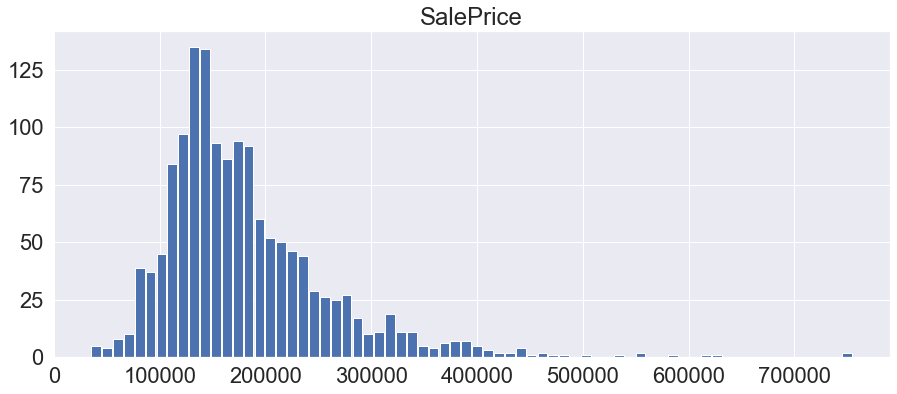

In [22]:
data_train.hist(column = 'SalePrice', bins = 70,figsize=(15,6), zorder=2, rwidth=0.9)
print(data_train['SalePrice'].describe())

**Строим диаграмму размаха цены исходного датасета**

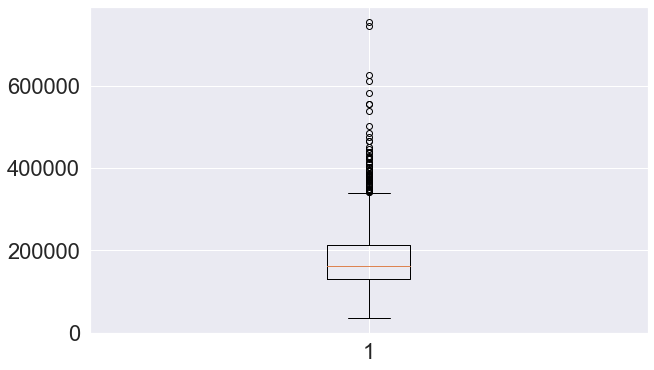

In [23]:
plt.figure(figsize=(10,6))
plt.boxplot(x=data_train['SalePrice'])
plt.show()

**Строим диаграмму рассеивания**

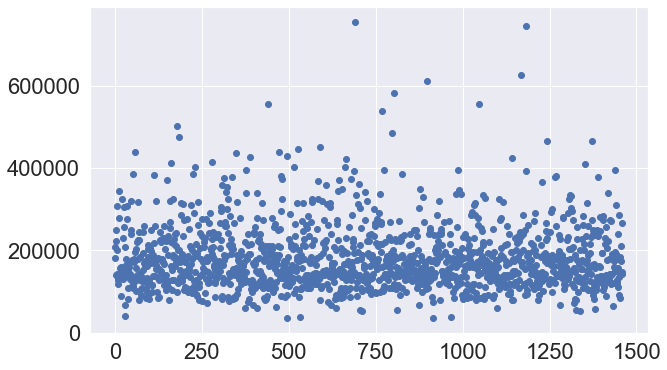

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(x = list(range(data_train['SalePrice'].size)),
                       y = data_train['SalePrice'].tolist())
plt.show()

**Определяем типы данных присутствующие в датасете**

In [25]:
print('В датафрейме содержатся типы данных: ', data_train.dtypes.unique())
print('Количество столбцов типа int64: ', data_train.dtypes[data_train.dtypes == 'int64'].count())
print('Количество столбцов типа objects (O) : ', data_train.dtypes[data_train.dtypes == 'O'].count())
print('Количество столбцов типа float64 : ', data_train.dtypes[data_train.dtypes == 'float64'].count())

В датафрейме содержатся типы данных:  [dtype('int64') dtype('O') dtype('float64')]
Количество столбцов типа int64:  34
Количество столбцов типа objects (O) :  43
Количество столбцов типа float64 :  3


**Проверяем корреляцию между выходной переменной и входными (измерение влияния факторов на выходную переменную)**

In [26]:
corrmat = data_train.corr()
k = 10 # количество коррелирующих признаков, которое мы хотим увидеть
corrmat.nlargest(k, 'SalePrice').index #Отображаем столбцы максимальной корреляции по возрастанию

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

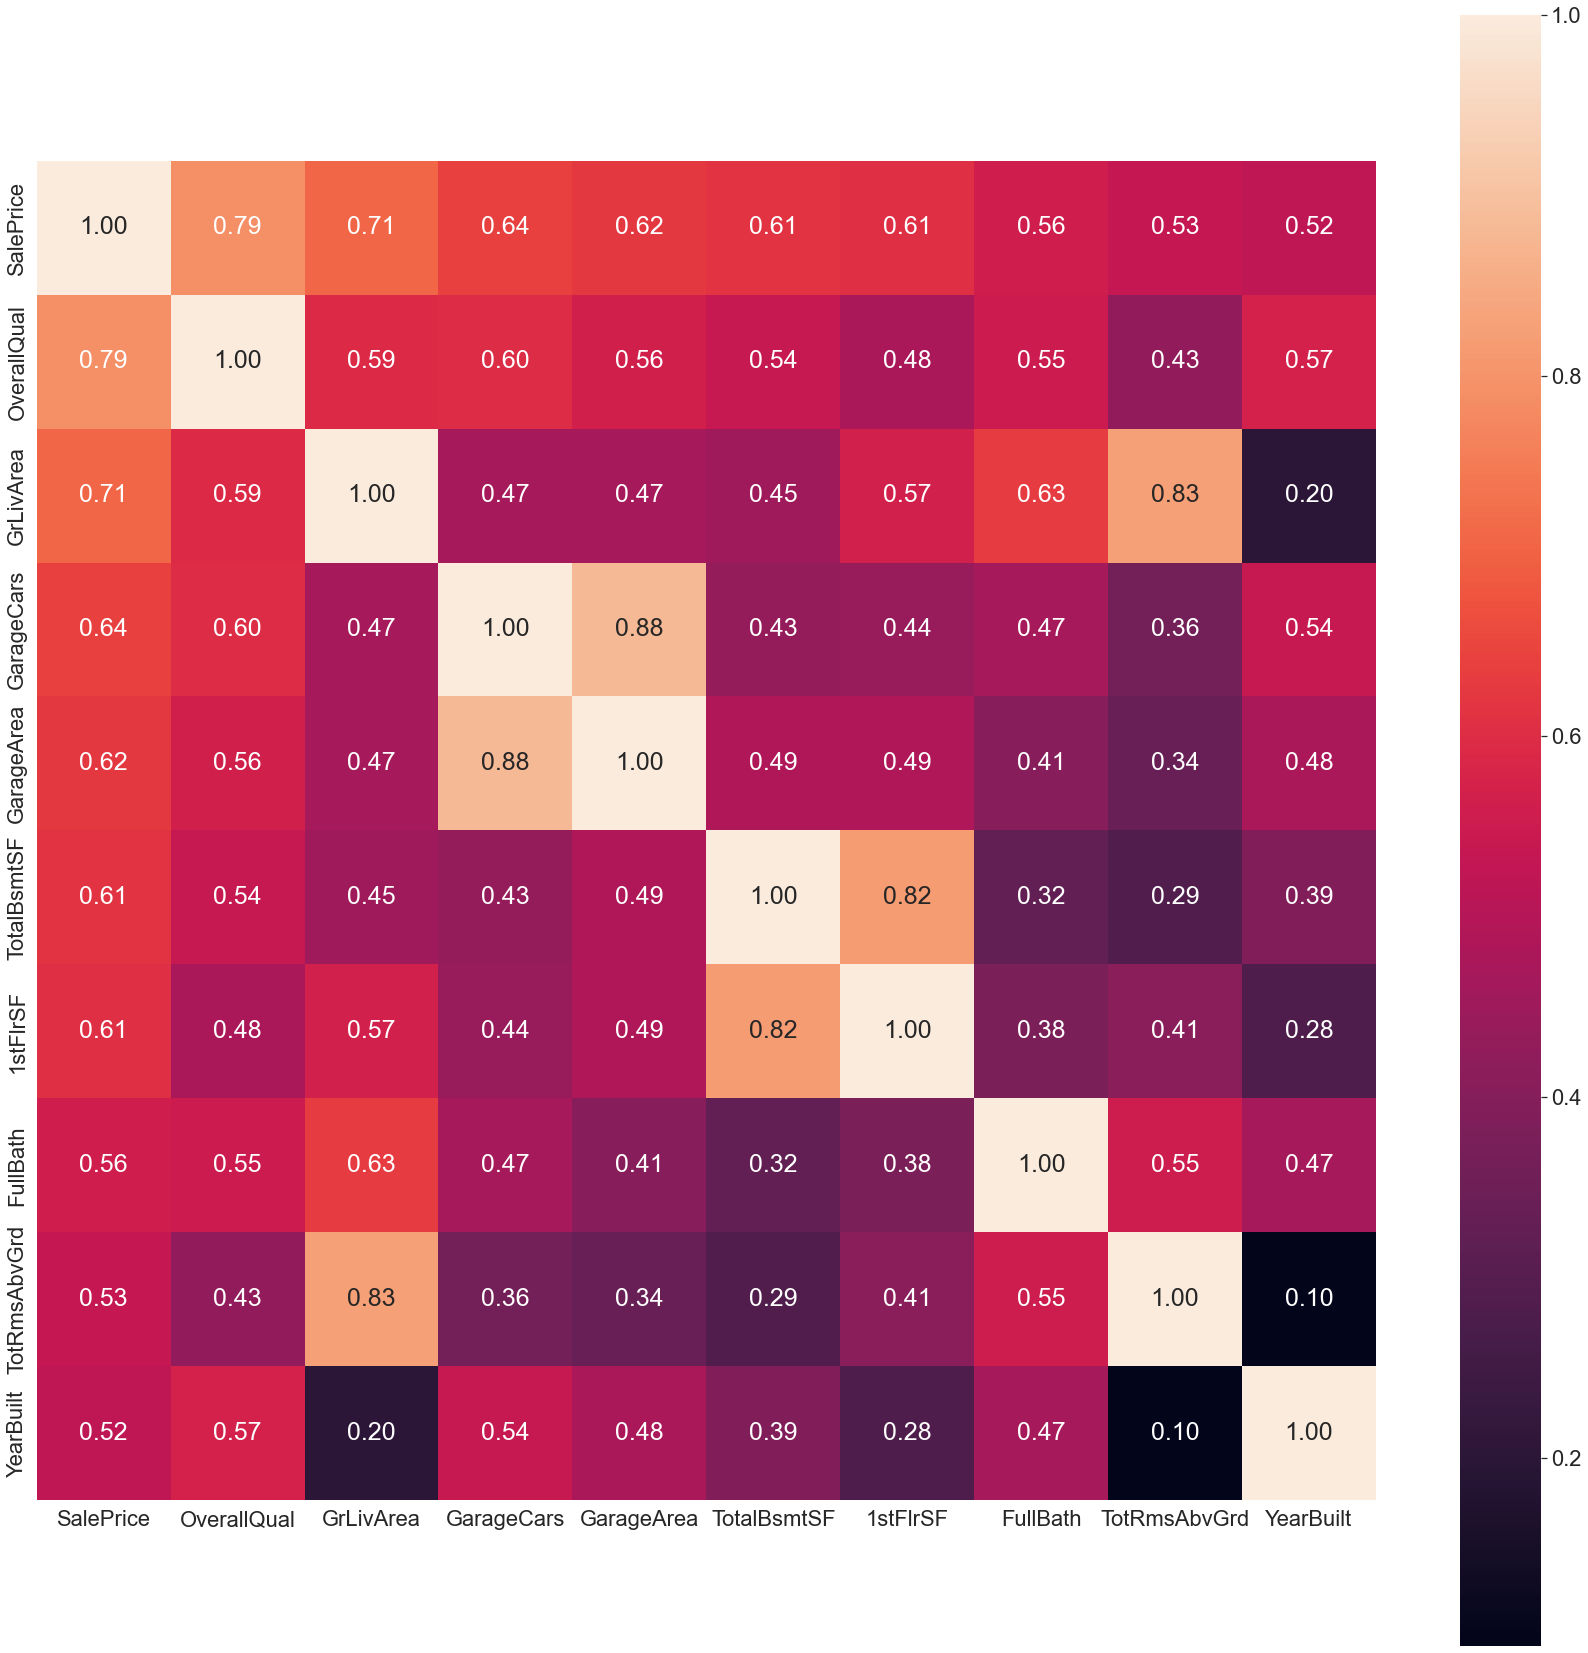

In [27]:
plt.figure(figsize=(30,30))
cols = corrmat.nlargest(k, 'SalePrice').index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 25}, 
                 yticklabels=cols.values, xticklabels=cols.values)

**Строим графики расределений максимально коррелиремых значений с ценой, а также диаграмму размаха для каждого значения**

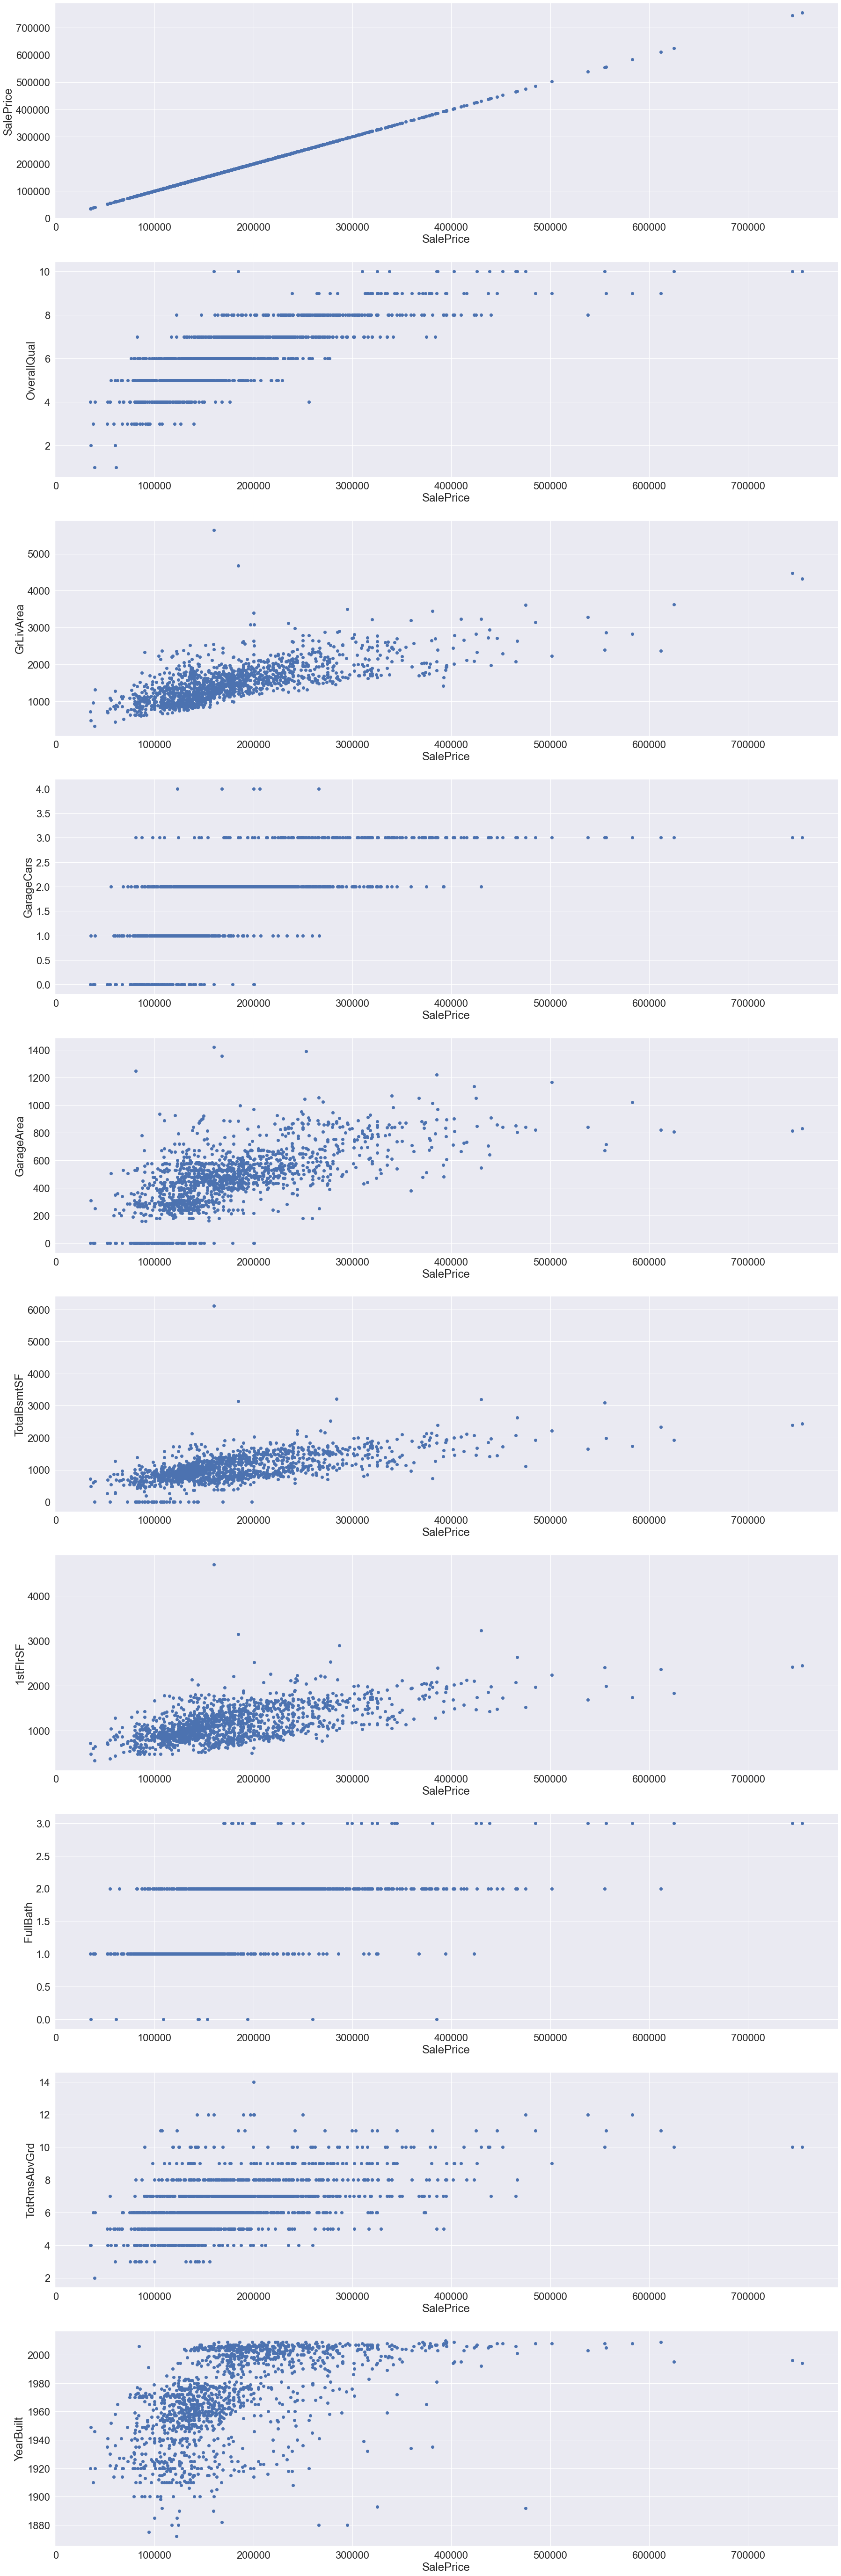

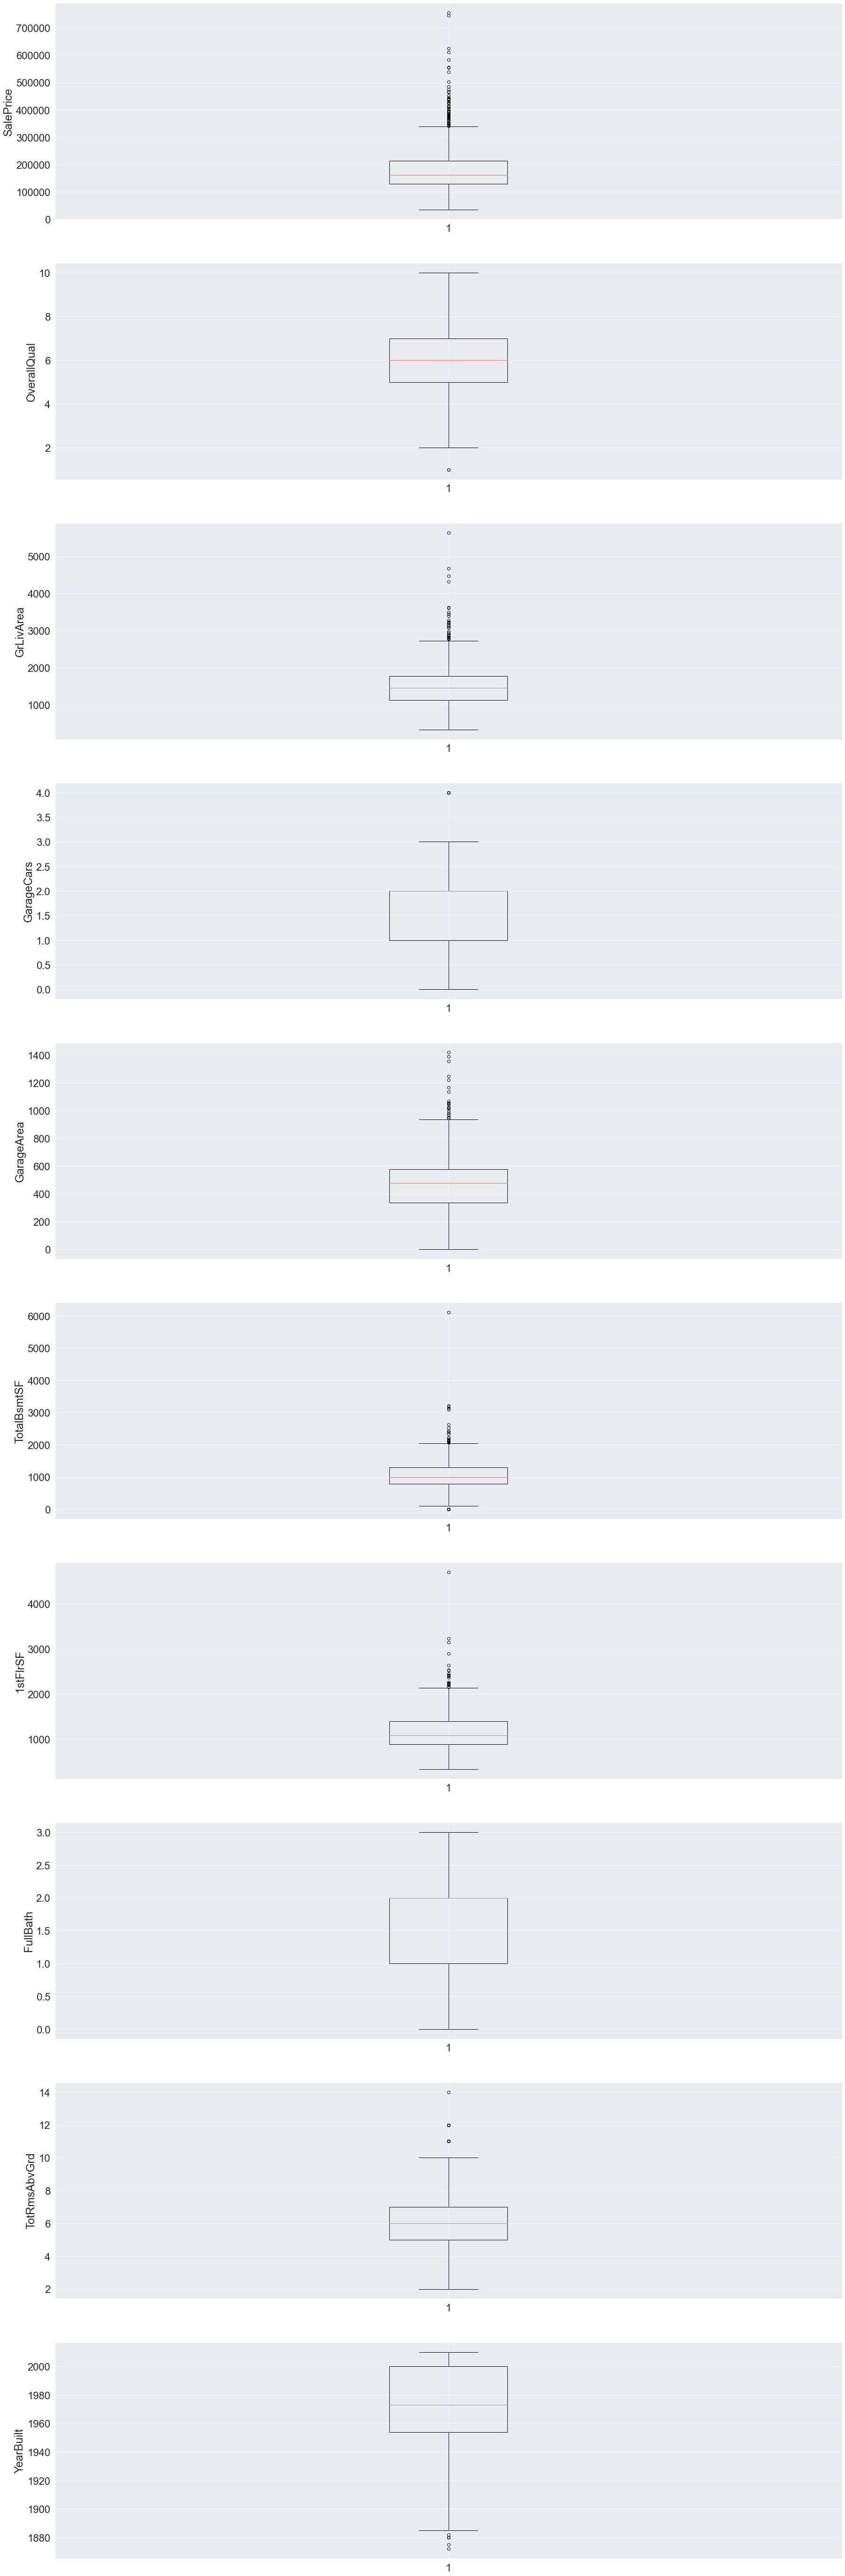

In [28]:
fig, axs = plt.subplots(nrows = len(corrmat.nlargest(k, 'SalePrice').index)  , ncols= 1 ,figsize=(30,100))
for ctn, i in enumerate(corrmat.nlargest(k, 'SalePrice').index):
    axs[ctn].scatter(data_train['SalePrice'], data_train[i])
    axs[ctn].set_xlabel('SalePrice')
    axs[ctn].set_ylabel(i)

fig_1, axs_1 = plt.subplots(nrows = len(corrmat.nlargest(k, 'SalePrice').index)  , ncols= 1 ,figsize=(30,100))
for ctn, i in enumerate(corrmat.nlargest(k, 'SalePrice').index):
    axs_1[ctn].boxplot(data_train[i])
    axs_1[ctn].set_ylabel(i)

plt.show()

Можно наблюдать, что данные имеют большое количество выбросов. Соответстенно необходимо реализовать их фильтрацию, обратившись к рисунку № 1, можно заметить, что распределение имеет не симметричные хвосты, соответственно мы не може применять **метод стандартного отклонения**. По этому было принято решение использовать **Метод интерквартильных расстояний**.
Для реализации данного метода, нам необходимо найти первый (Q1) и третий (Q3) квартил, и на основе них найти "экстримальные" значения по формулам: Limmax = Q3 + Ni х IQR; Limmin = Q1 - Ni х IQR; где Q3 - третий квартиль, Q1 - первый квартиль, IQR - интерквартильное расстояние определяемое по формуле IQR = Q3 - Q1; Ni - заданное число интерквартильного размаха (1.5).

**Производим метод интерквартильных расстояний и фильтруем данные**

In [1]:
# for ctr, i in enumerate(data_train[corrmat.nlargest(k, 'SalePrice').index.drop('SalePrice')].columns):
#     Q1 = q1(data_train[i])
#     Q3 = q3(data_train[i])
#     IQR = Q3 - Q1
#     min_ = Q1 - 1.5 * IQR
#     max_ = Q3 + 1.5 * IQR
#     data_train.hist(column = i, bins = 10,figsize=(15,6), zorder=2, rwidth=0.9)
# #     data_train = data_train.drop(data_train[((data_train[i] > min_) & (data_train[i] < max_))].index)
#     print(i, '-' , 'Q1: ',Q1, ';', 'Q3: ', Q3,';', 'IQR:', IQR, ';' ,'min:', abs(Q1 - 1.5*IQR),'max:', abs(Q3 + 1.5*IQR))



Попробовав провести автоматическую очистку данных, мы столкнулись с проблемой потери 98% данных, по этой причине приходитеся использовать ручную подготовку 

In [55]:
#Функция рассчета первого квартиля
def q1(x):
    return np.quantile(x, 0.25 )
#Функция рассчета второго квартиля
def q3(x):
    return np.quantile(x, 0.75)

Q1 = q1(data_train['SalePrice'])
Q3 = q3(data_train['SalePrice'])
IQR = Q3-Q1
min_ = Q1 - 1.5 * IQR
max_ = Q3 + 1.5 * IQR
print('SalePrice Q1', Q1)
print('SalePrice Q3', Q3)
print('SalePrice IQR', IQR)
print('SalePrice min', min_)
print('SalePrice max', max_)
# data_train = data_train.drop(data_train[((data_train['SalePrice'] > min_) & (data_train['SalePrice'] < max_))].index)



SalePrice Q1 128000.0
SalePrice Q3 196500.0
SalePrice IQR 68500.0
SalePrice min 25250.0
SalePrice max 299250.0


In [ ]:
data_train = data_train.drop(data_train[((max_ < data_train['SalePrice'])) & ((data_train['SalePrice'] > min_))].index)
# min(data_train.drop(data_train[((max_ < data_train['SalePrice'])) & ((data_train['SalePrice'] > min_))].index)['SalePrice'])

In [68]:
Q1 = q1(data_train['OverallQual'])
Q3 = q3(data_train['OverallQual'])
IQR = Q3-Q1
min_ = Q1 - 1.5 * IQR
max_ = Q3 + 1.5 * IQR
print('OverallQual Q1', Q1)
print('OverallQual Q3', Q3)
print('OverallQual IQR', IQR)
print('OverallQual min', min_)
print('OverallQual max', max_)

OverallQual Q1 5.0
OverallQual Q3 7.0
OverallQual IQR 2.0
OverallQual min 2.0
OverallQual max 10.0


In [70]:
data_train = data_train.drop(data_train[((max_ <= data_train['OverallQual'])) & ((data_train['OverallQual'] >= min_))].index)
# min(data_train.drop(data_train[((max_ < data_train['SalePrice'])) & ((data_train['SalePrice'] > min_))].index)['SalePrice'])

In [73]:
Q1 = q1(data_train['GrLivArea'])
Q3 = q3(data_train['GrLivArea'])
IQR = Q3-Q1
min_ = Q1 - 1.5 * IQR
max_ = Q3 + 1.5 * IQR
print('GrLivArea Q1', Q1)
print('GrLivArea Q3', Q3)
print('GrLivArea IQR', IQR)
print('GrLivArea min', min_)
print('GrLivArea max', max_)

GrLivArea Q1 1109.25
GrLivArea Q3 1700.75
GrLivArea IQR 591.5
GrLivArea min 222.0
GrLivArea max 2588.0


In [74]:
data_train = data_train.drop(data_train[((max_ <= data_train['GrLivArea'])) & ((data_train['GrLivArea'] >= min_))].index)
# min(data_train.drop(data_train[((max_ < data_train['SalePrice'])) & ((data_train['SalePrice'] > min_))].index)['SalePrice'])

In [75]:
data_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


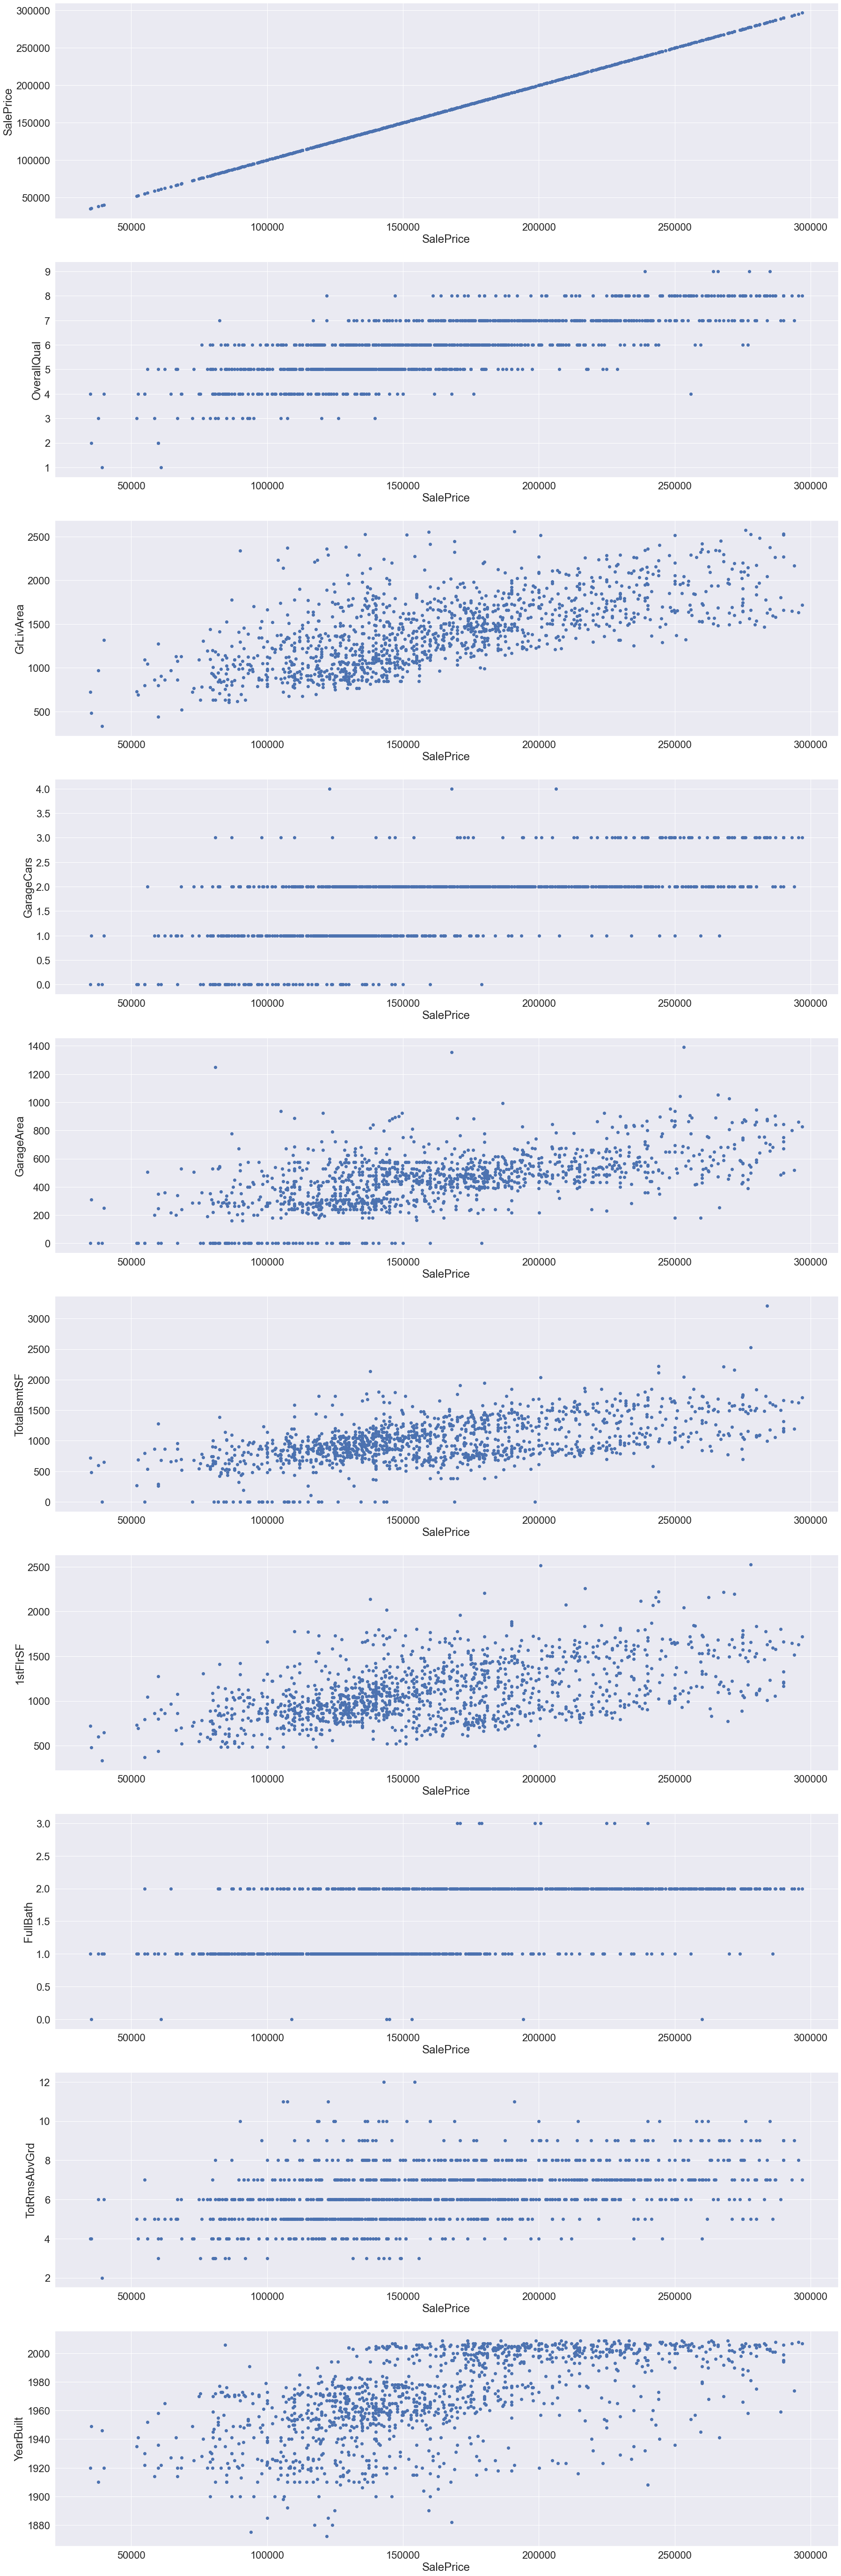

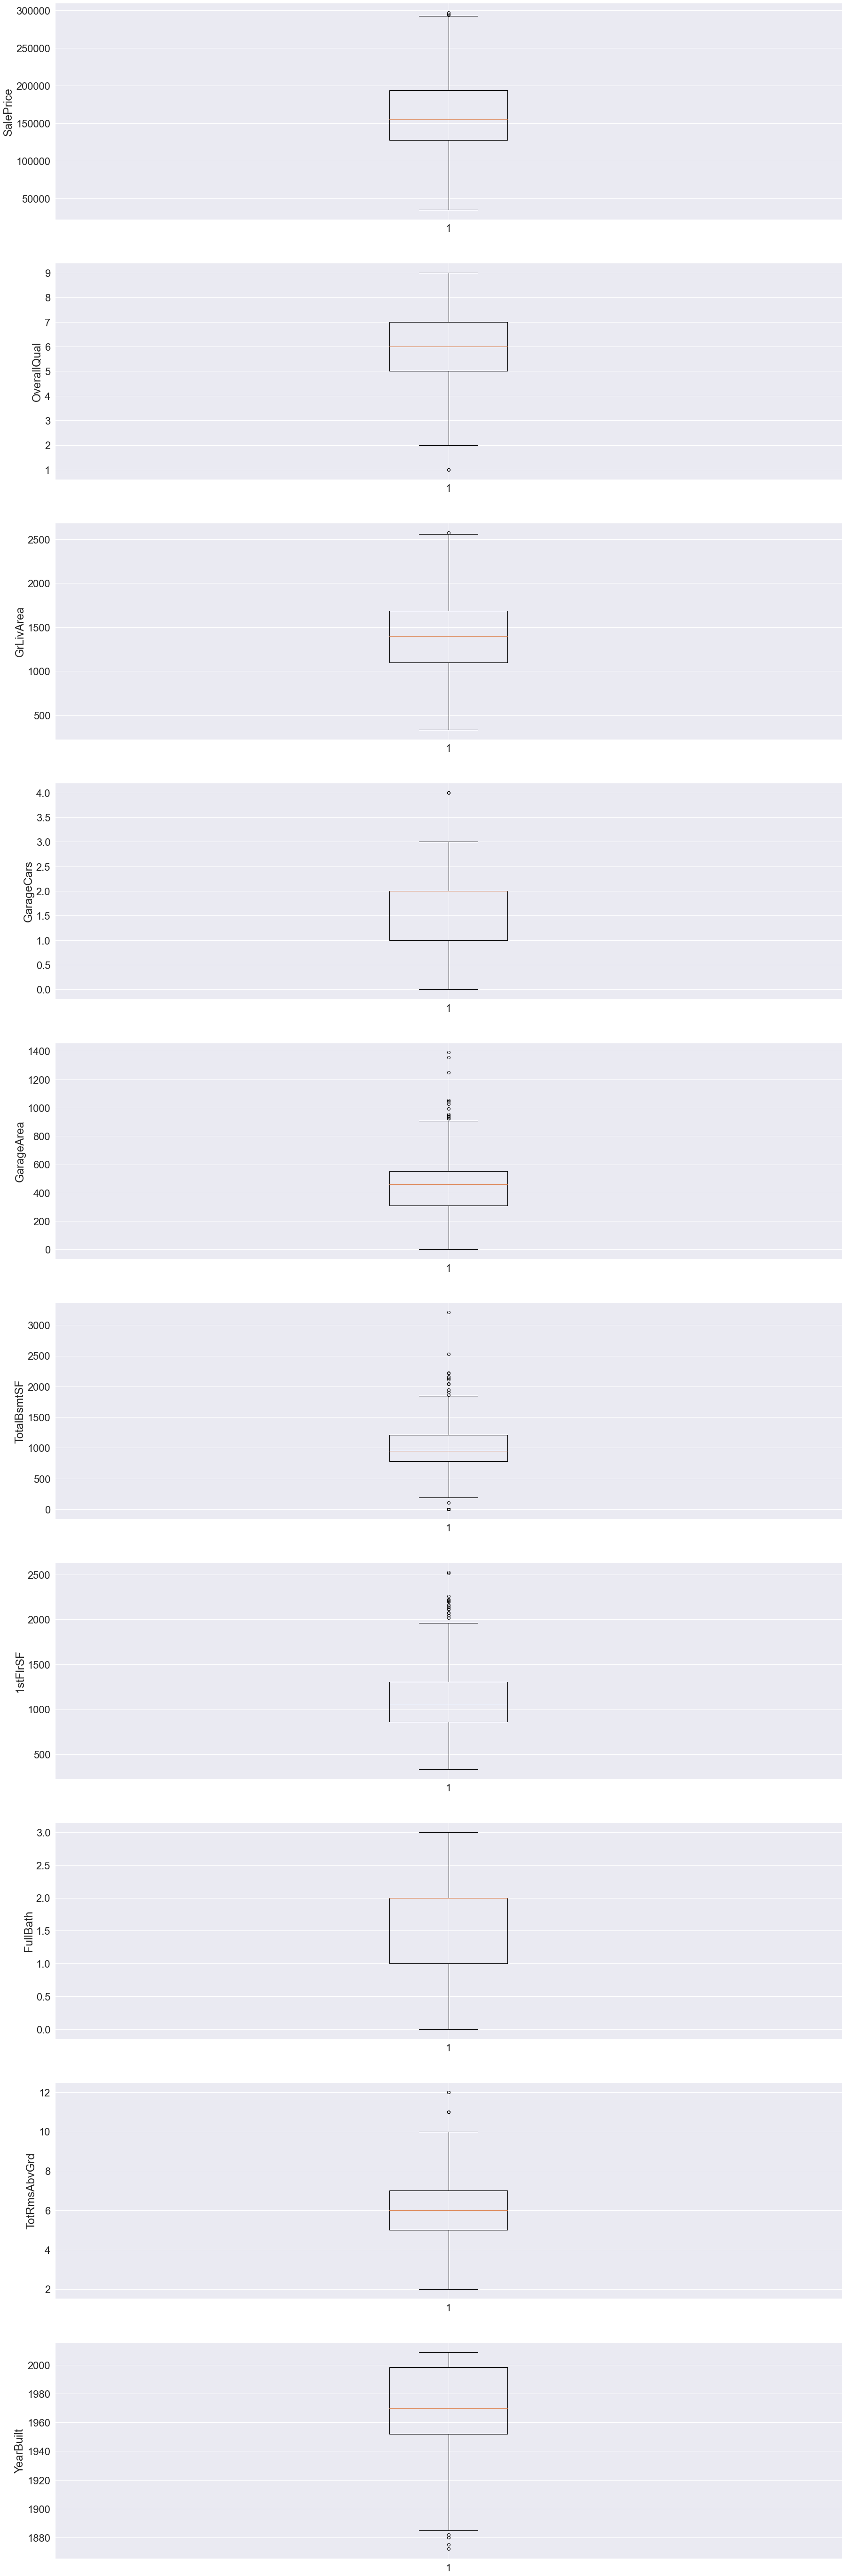

In [76]:
fig, axs = plt.subplots(nrows = len(corrmat.nlargest(k, 'SalePrice').index)  , ncols= 1 ,figsize=(30,100))
for ctn, i in enumerate(corrmat.nlargest(k, 'SalePrice').index):
    axs[ctn].scatter(data_train['SalePrice'], data_train[i])
    axs[ctn].set_xlabel('SalePrice')
    axs[ctn].set_ylabel(i)

fig_1, axs_1 = plt.subplots(nrows = len(corrmat.nlargest(k, 'SalePrice').index)  , ncols= 1 ,figsize=(30,100))
for ctn, i in enumerate(corrmat.nlargest(k, 'SalePrice').index):
    axs_1[ctn].boxplot(data_train[i])
    axs_1[ctn].set_ylabel(i)

plt.show()

# Подготавливаем данные для обучения

In [95]:
list(data_train[corrmat.nlargest(k, 'SalePrice').index].columns)

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

In [96]:
data_for_fit = data_train[corrmat.nlargest(k, 'SalePrice').index]

In [149]:
# Проверяем на наличие отсутствующих значений
data_for_fit.isnull().value_counts()

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt
False      False        False      False       False       False        False     False     False         False        1323
dtype: int64

In [142]:
# Отделяем значения для обучения модели
test_size = 0.3
train_size = 0.7
random_state = 42

train, test= train_test_split(data_for_fit, 
                              test_size = test_size, 
                              train_size = train_size,
                              random_state = random_state)   
train_X = train.drop('SalePrice', axis = 1)
train_Y = train['SalePrice']
test_X = test.drop('SalePrice', axis = 1)
test_Y = test['SalePrice']

In [143]:
train_X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
150,5,969,2,440,969,969,1,5,1975
1280,7,1573,2,544,1573,1573,2,6,2002
1397,5,1513,1,180,939,939,1,8,1920
248,7,1668,2,500,840,840,2,8,2003
536,7,1724,2,527,880,880,2,8,1998
...,...,...,...,...,...,...,...,...,...
1210,6,1845,2,462,1055,1055,2,8,1992
1248,6,2058,2,396,735,1134,1,8,1917
1429,6,1440,2,467,1440,1440,2,7,1981
955,6,1958,2,492,979,979,2,8,1946


In [144]:
train_Y

150     122000
1280    227000
1397    137500
248     180000
536     188000
         ...  
1210    189000
1248    129500
1429    182900
955     145000
1244    230000
Name: SalePrice, Length: 926, dtype: int64

In [145]:
test_X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
815,7,1661,2,598,1649,1661,2,6,1998
533,1,334,0,0,0,334,1,2,1946
264,5,764,2,504,680,764,1,4,1925
467,5,1644,1,312,728,888,1,7,1942
56,8,1739,2,480,970,983,2,7,1999
...,...,...,...,...,...,...,...,...,...
696,5,616,1,205,616,616,1,4,1921
153,6,1252,2,564,1602,1252,1,4,1960
1083,6,1251,1,461,1251,1251,1,6,1964
687,7,1102,2,480,551,551,2,4,2004


In [146]:
test_Y

815     224900
533      39300
264      73000
467     146500
56      172500
         ...  
696      89000
153     235000
1083    160000
687     148800
594     110000
Name: SalePrice, Length: 397, dtype: int64